<a href="https://colab.research.google.com/github/Riyayrd/MachineLearning/blob/main/LinearRegression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

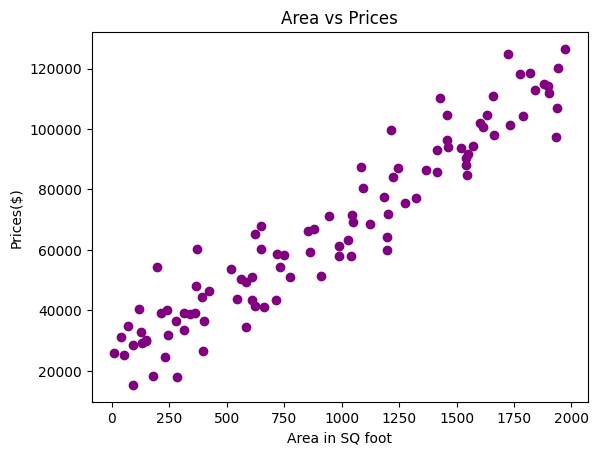

In [3]:
np.random.seed(42)
X=2*np.random.rand(100,1)*1000
Y=50 * X + 20000 + np.random.randn(100, 1) * 10000

plt.scatter(X,Y,color='purple')
plt.xlabel('Area in SQ foot')
plt.ylabel('Prices($)')
plt.title('Area vs Prices')
plt.show()

In [4]:
model=LinearRegression()
model.fit(X,Y)

print(f"Weight w:{model.coef_[0][0]:.2f}")
print(f"Bias b:{model.intercept_[0]:.2f}")

Weight w:47.70
Bias b:22150.96


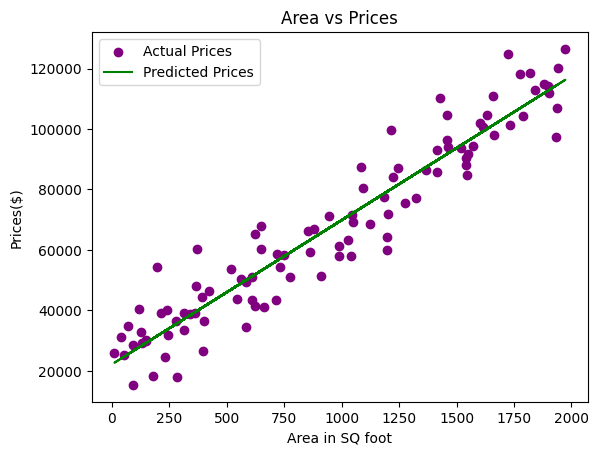

In [7]:
Y_pred=model.predict(X)
plt.scatter(X,Y,color='purple',label='Actual Prices')
plt.plot(X,Y_pred,color='green',label='Predicted Prices')
plt.xlabel('Area in SQ foot')
plt.ylabel('Prices($)')
plt.title('Area vs Prices')
plt.legend()
plt.show()

In [8]:
mse=mean_squared_error(Y,Y_pred)
print(f"Mean Squared Error (MSE):{mse:.2f}")

Mean Squared Error (MSE):80658456.40


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

Weight w:28362.41
Bias b:67001.97


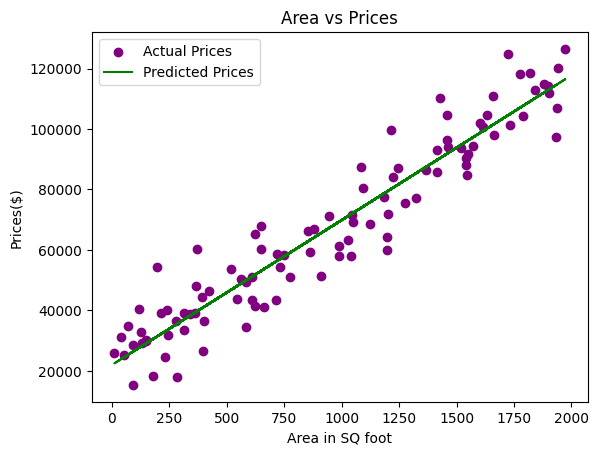

In [12]:
sgd_model=SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.01)
sgd_model.fit(X_scaled,Y.ravel())

print(f"Weight w:{sgd_model.coef_[0]:.2f}")
print(f"Bias b:{sgd_model.intercept_[0]:.2f}")

y_sgd_pred=sgd_model.predict(X_scaled)
plt.scatter(X,Y,color='purple',label='Actual Prices')
plt.plot(X,y_sgd_pred,color='green',label='Predicted Prices')
plt.xlabel('Area in SQ foot')
plt.ylabel('Prices($)')
plt.title('Area vs Prices')
plt.legend()
plt.show()

In [13]:
mse_sgd=mean_squared_error(Y,y_sgd_pred)
print(f"Mean Squared Error (MSE):{mse_sgd:.2f}")

Mean Squared Error (MSE):80673737.66


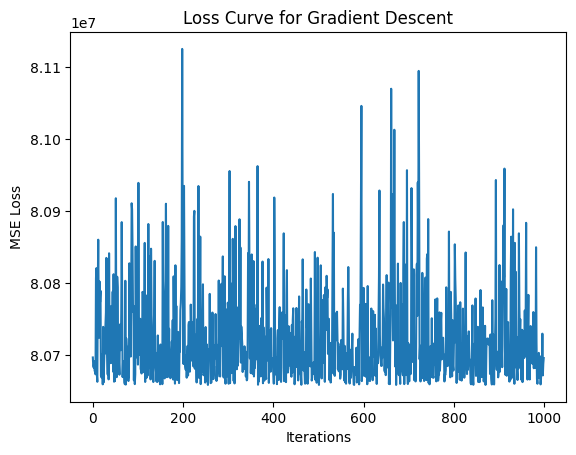

In [14]:
loss_history = []

for i in range(1000):
    sgd_model.partial_fit(X_scaled, Y.ravel())  # Fit one step at a time
    y_sgd_pred = sgd_model.predict(X_scaled)
    loss = mean_squared_error(Y, y_sgd_pred)
    loss_history.append(loss)

# Plot loss curve
plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Loss Curve for Gradient Descent")
plt.show()
